<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [9]:
#This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.

%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from math import pi

In [10]:
#Define functions
###############################################
###############################################
def func1(x,t,L,polarity):
    arg1 = (x - (t/10.)*np.ones(len(x)))
    f1 = np.zeros(len(x))
    for i in range(len(arg1)):
        if arg1[i] < 0:
            f1[i] = 0.
        elif 0 <= arg1[i] <= 2:
            f1[i] = 1.
        elif 0 < arg1[i]:
            f1[i] = 0.

    x = L - x
    arg2 = (x - (t/10.)*np.ones(len(x)))
    f2 = np.zeros(len(x))
    for i in range(len(arg2)):
        if arg2[i] < 0:
            f2[i] = 0.
        elif 0 <= arg2[i] <= 2:
            f2[i] = 1.
        elif 0 < arg2[i]:
            f2[i] = 0.
            
    if polarity=="pos":
        return f1+f2, f1, f2
        
    elif polarity=="neg":
        return f1-f2, f1, -f2


def func2(x,t,L,polarity):
    arg1 = (x - (t/10.)*np.ones(len(x)))
    f1 = np.zeros(len(x))
    for i in range(len(arg1)):
        if arg1[i] < 0:
            f1[i] = 0.
        elif 0 <= arg1[i] <= 1.:
            f1[i] = arg1[i]
        elif 1. <= arg1[i] <= 2.:
            f1[i] = 2.-arg1[i]
        elif 0 < arg1[i]:
            f1[i] = 0.

    x = L - x
    arg2 = (x - (t/10.)*np.ones(len(x)))
    f2 = np.zeros(len(x))
    for i in range(len(arg2)):
        if arg2[i] < 0:
            f2[i] = 0.
        elif 0 <= arg2[i] <= 1.:
            f2[i] = arg2[i]
        elif 1. <= arg2[i] <= 2.:
            f2[i] = 2.-arg2[i]
        elif 0 < arg2[i]:
            f2[i] = 0.

    if polarity=="pos":
        return f1+f2, f1, f2
        
    elif polarity=="neg":
        return f1-f2, f1, -f2
        


def func3(x,t,L,polarity):
    arg1 = (x - (t/10.)*np.ones(len(x)))
    f1 = np.zeros(len(x))
    for i in range(len(arg1)):
        if arg1[i] < 0:
            f1[i] = 0.
        elif 0 <= arg1[i] <= 2.:
            f1[i] = np.sqrt(1-(arg1[i]-1.)**2.)
        elif 0 < arg1[i]:
            f1[i] = 0.

    x = L - x
    arg2 = (x - (t/10.)*np.ones(len(x)))
    f2 = np.zeros(len(x))
    for i in range(len(arg2)):
        if arg2[i] < 0:
            f2[i] = 0.
        elif 0 <= arg2[i] <= 2.:
            f2[i] = np.sqrt(1-(arg2[i]-1.)**2.)
        elif 0 < arg2[i]:
            f2[i] = 0.
        
    if polarity=="pos":
        return f1+f2, f1, f2
        
    elif polarity=="neg":
        return f1-f2, f1, -f2
        

def func4(x,t,L,polarity):
    arg1 = ((x-1) - (t/10.)*np.ones(len(x)))
    f1 = np.exp(-(2.*arg1)**2.)
    
    x = L - x
    arg2 = ((x-1) - (t/10.)*np.ones(len(x)))
    f2 = np.exp(-(2.*arg2)**2.)
        
    if polarity=="pos":
        return f1+f2, f1, f2
        
    elif polarity=="neg":
        return f1-f2, f1, -f2

<IPython.core.display.Javascript object>


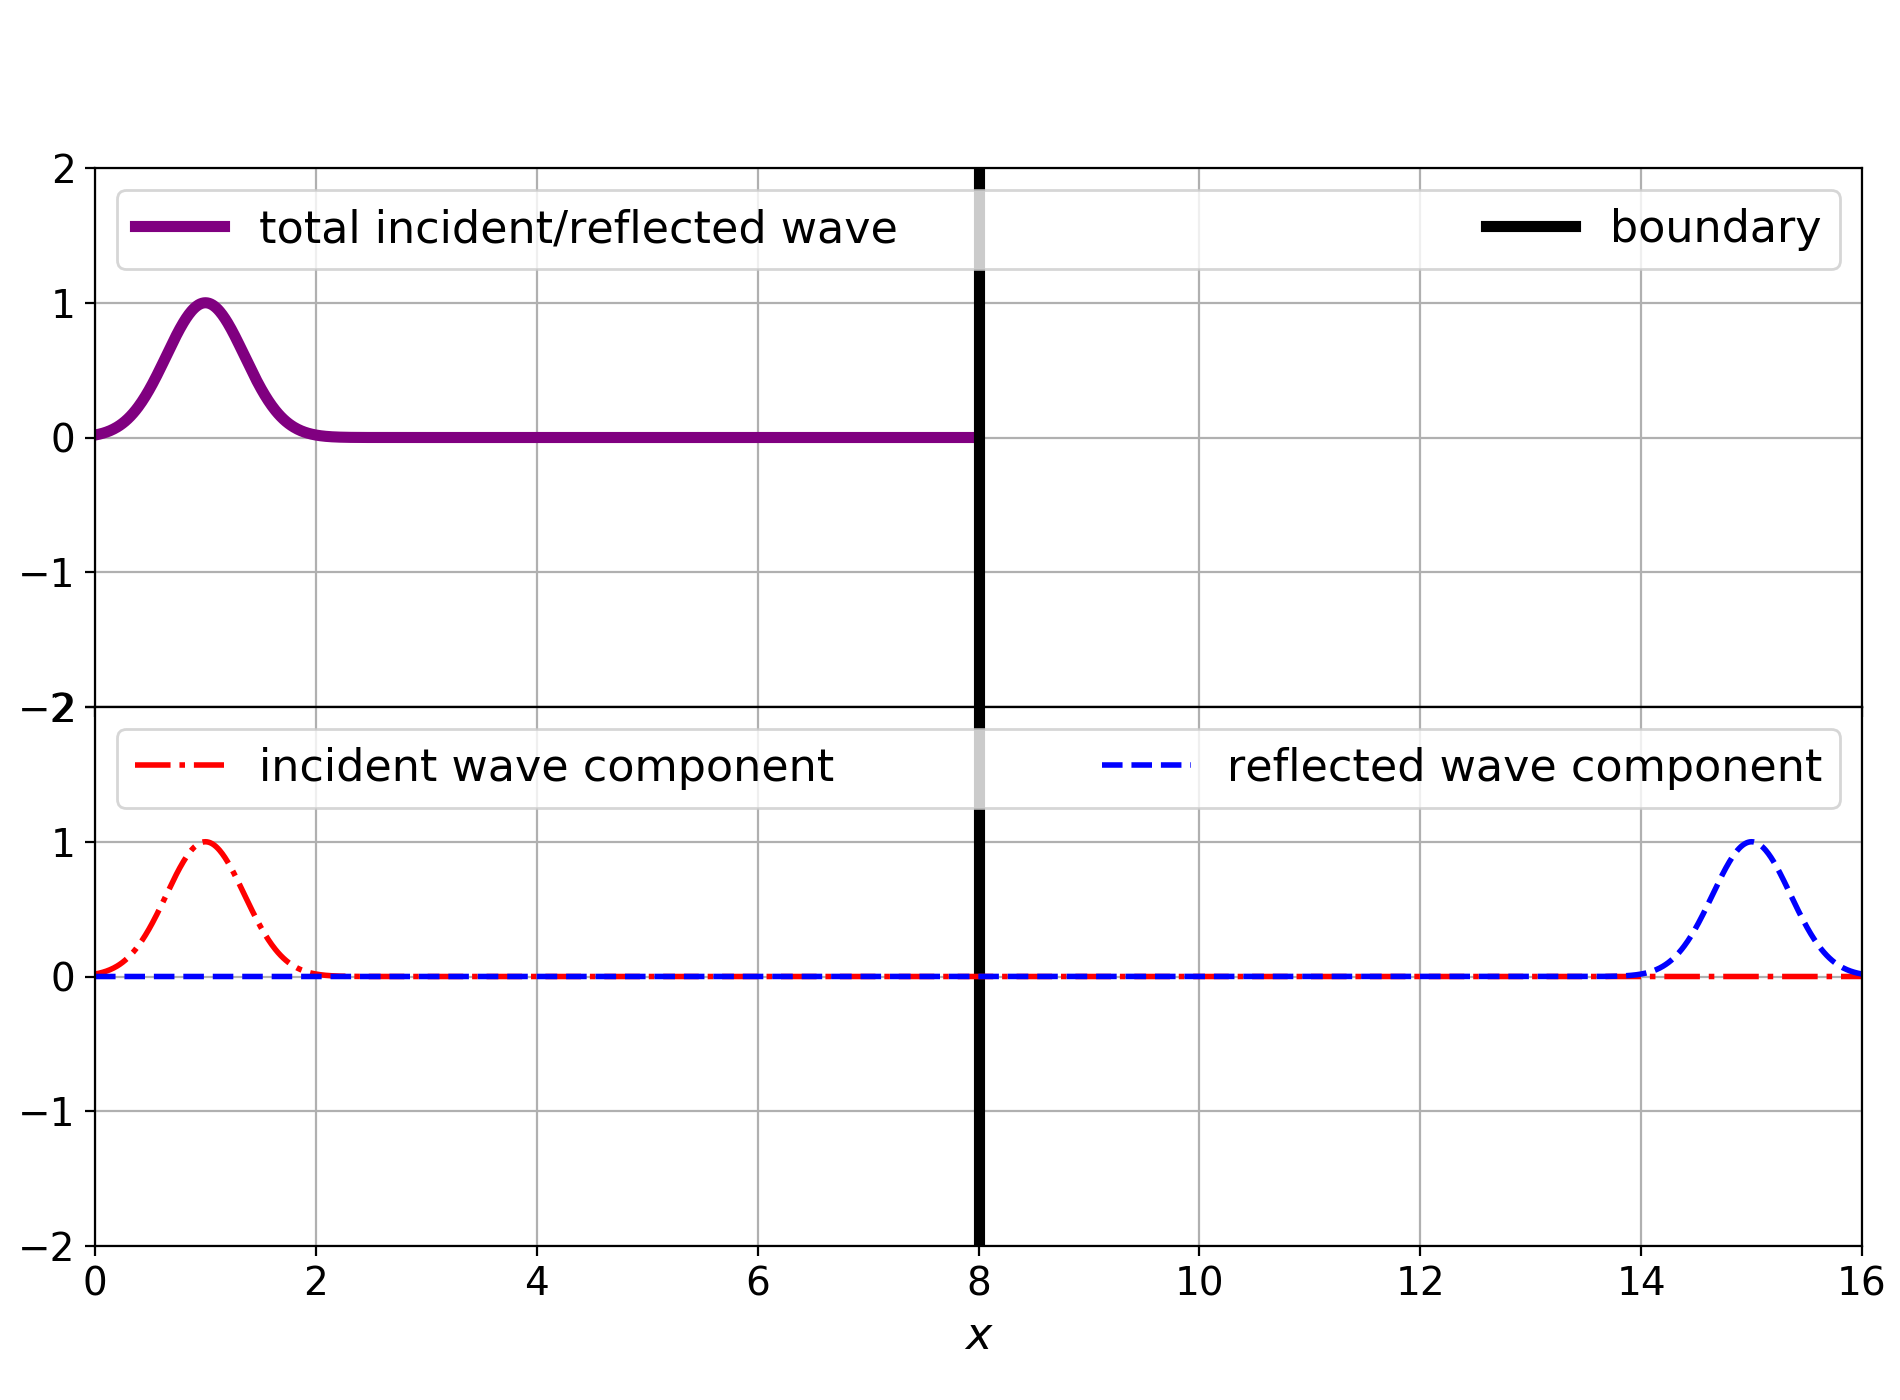

In [11]:
#Define plot
###############################################
###############################################
fig, ax = plt.subplots(2, 1, figsize=(9.5, 7))
plt.subplots_adjust(left=0.05, bottom=None, right=0.98, top=None, wspace=None, hspace=0)
L=16
x0 = np.linspace(0., L, 2000)
x1 = np.linspace(0., L/2., 1000)
x2 = np.linspace(L/2., L, 1000)
polarity = "pos"
func=func1
t=0.

#############################
#plot1
line_1, = ax[0].plot(x1, func(x1,t,L,polarity)[0],
                     '-', color='purple', lw=4, label="total incident/reflected wave")

ax[0].plot([L/2.,L/2.], [-2,2],
                     'k-', lw=4, label="boundary")

#plot params
#ax[0].set_title('Amplitude: $A(x,t)$', fontsize=16)
#ax[0].set_xlabel('$x$', fontsize=16)
ax[0].set_ylim(-2,2)
ax[0].set_xlim(min(x1),max(x2))
ax[0].grid(True)
ax[0].legend(loc=1, mode="expand", ncol=2, fontsize=16)
ax[0].yaxis.set_major_locator(MultipleLocator(1))
plt.setp(ax[0].get_xticklabels(), visible=False)
plt.setp(ax[0].get_yticklabels(), fontsize=14)

#############################
#plot2
y_max = max(func(x1,t,L,polarity)[0])*3

ax[1].plot([L/2.,L/2.], [-2,2],
                     'k-', lw=4)

line_3, = ax[1].plot(x0, func(x0,t,L,polarity)[1],
                     'r-.', lw=2, label="incident wave component")

line_2, = ax[1].plot(x0, func(x0,t,L,polarity)[2],
                     'b--', lw=2, label="reflected wave component")


#plot params
ax[1].set_xlabel('$x$', fontsize=16)
ax[1].set_ylim(-2,2)
ax[1].set_xlim(min(x1),max(x2))
ax[1].grid(True)
ax[1].legend(loc=1, mode="expand", ncol=2, fontsize=16)
ax[1].yaxis.set_major_locator(MultipleLocator(1))
plt.setp(ax[1].get_xticklabels(), fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)

#Define plot updater
###############################################
###############################################
def update(func,t,polarity):
    #plot1
    #############################
    line_1.set_ydata(func(x1,t,L,polarity)[0])
    line_2.set_ydata(func(x0,t,L,polarity)[2])
    line_3.set_ydata(func(x0,t,L,polarity)[1])
    
    fig.canvas.draw_idle()
    return


#Define control elements
###############################################
###############################################
s1=widgets.Dropdown(
    options=[('function-1', func1),('function-2', func2),('function-3', func3),('function-4', func4)],
    value=func4,
    description='Function:')


s1_1=widgets.Dropdown(
    options=[('open boundary', "pos"),('fixed boundary', "neg")],
    value="pos",
    description='Boundary:')


s2=widgets.IntSlider(
    min=0,
    max=L*10,
    step=1.,
    value=0.,
    layout=Layout(width='600px'),
    description='$t$',
    style = {'description_width': 'initial'})


#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'func': s1, 'polarity': s1_1, 't': s2})


#Set layout
###############################################
###############################################
box_layout = Layout(display='flex', flex_flow='row', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
d = display(HBox([s1, s1_1, s2], layout=box_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3"><b>Plot:</b> This plot shows the reflection of an incident wave at a boundary (black vertical line). Reflection can be modeled as the superposition of identical waves traveling towards each other. 
<ul>
    <li>(purple line, upper plot) the superposition of incident and reflected wave components</li>
    <li>(black vertical line) the boundary</li>
    <li>(red dot-dashed line, lower plot) the incident wave component $f_{i}(x,t)$</li>
    <li>(blue dashed line, lower plot) the reflected (counter-propagating) wave component $f_{r}(x,t)$</li>
    <li>The boundary condition determines "how" the incident wave component (red) and reflected wave component (blue) are superposed (either with positive or negative polarity)</li>
</ul>
</font>

<br/>
<font size="3"><b>Drop-down and Sliders:</b>
<ul>
    <li>Function: select a function from the drop-down menu.</li>
    <li>Boundary: choose the boundary condition (either open or fixed)</li>
    <li>$t$: vary the time to display the functions advancing towards each other</li>
</ul>
</font>

<br/>

<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>What do you expect the superposition of different waveforms to look like?</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [12]:
#The code in this block includes content from StackOverFlow User: harshil (CC BY-SA 4.0)
#and can be found here: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
###############################################
###############################################
#Enable hidden code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
